# <b>1. Importing libraries</b>

In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

# <b>2. Membaca dataset</b>

In [2]:
df = pd.read_csv('../input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# <b>3. Data Cleaning</b>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
# Cek nilai unik
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [5]:
# Karena kita ingin mendiagnosis sebagai 'Yes' untuk penyakit jantung, meskipun ada kemungkinan kecil, mari kita pertimbangkan 'No, borderline diabetes' dan 'Yes (during pregnancy)' sebagai 'No'.
df['Diabetic'] = df.Diabetic.apply(lambda x: 'No' if x == 'No, borderline diabetes' or x == 'Yes (during pregnancy)' else x)
df.Diabetic.value_counts()

No     278993
Yes     40802
Name: Diabetic, dtype: int64

In [6]:
# Perhatikan bahwa kita memiliki beberapa variabel kategorik nominal dengan nilai Yes/No. Mari kita ubah ke biner 1/0
column_yesno = ["HeartDisease", "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "Diabetic", "PhysicalActivity", "Asthma", "KidneyDisease", "SkinCancer",]

df[column_yesno] = df[column_yesno].apply(lambda x: x.map({'Yes':1,'No':0})) # Mengubah ke biner
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,0,1,Very good,8.0,0,0,0


In [7]:
df[['Sex']] = df[['Sex']].apply(lambda x: x.map({'Male':1, 'Female':0}))
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,0,1,Very good,8.0,0,0,0


# <b>4. Data Preprocessing</b>

In [8]:
# Standarisasi data
from sklearn.preprocessing import StandardScaler 
Scaler = StandardScaler()
col = ['MentalHealth', 'BMI', 'PhysicalHealth', 'SleepTime'] # variabel numerik
df[col] = Scaler.fit_transform(df[col])

In [9]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,-1.844750,1,0,0,-0.046751,3.281069,0,0,55-59,White,1,1,Very good,-1.460354,1,0,1
1,0,-1.256338,0,0,1,-0.424070,-0.490039,0,0,80 or older,White,0,1,Very good,-0.067601,0,0,0
2,0,-0.274603,1,0,0,2.091388,3.281069,0,1,65-69,White,1,1,Fair,0.628776,1,0,0
3,0,-0.647473,0,0,0,-0.424070,-0.490039,0,0,75-79,White,0,0,Good,-0.763977,0,0,1
4,0,-0.726138,0,0,0,3.097572,-0.490039,1,0,40-44,White,0,1,Very good,0.628776,0,0,0


In [10]:
from sklearn.preprocessing import OneHotEncoder 
enc = OneHotEncoder() 

# Encoding variabel kategorik ordinal 
categ = df[['AgeCategory', 'Race', 'GenHealth']]
encoded_categ = pd.DataFrame(enc.fit_transform(categ).toarray())

# Menghubungkan encoed_cateh dengan df
df = pd.concat([df, encoded_categ], axis = 1)

# Menghapus variabel kategorik ordinal
df = df.drop(columns = ['AgeCategory', 'Race', 'GenHealth'], axis = 1)

In [11]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,...,14,15,16,17,18,19,20,21,22,23
0,0,-1.844750,1,0,0,-0.046751,3.281069,0,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0,-1.256338,0,0,1,-0.424070,-0.490039,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,-0.274603,1,0,0,2.091388,3.281069,0,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0,-0.647473,0,0,0,-0.424070,-0.490039,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0,-0.726138,0,0,0,3.097572,-0.490039,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# <b>5. Membagi data menjadi data latih dan data uji</b>

In [12]:
# Memilih fitur/variabel
features = df.drop(columns =['HeartDisease'], axis = 1)

# Memilih target
target = df['HeartDisease']

# membagi data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)

# <b>6. Modelling</b>

In [13]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Prediksi data uji 
    y_pred = model.predict(x_test)

    # Menghitung akurasi, presisi, recall, f1-score, dan kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Menghitung area di bawah kurva (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Menampilkan matriks konfusi
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [14]:
# Membangun model menggunakan KNeighborsClassifier 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)


# Evaluasi model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print hasil
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.9071123688613018
Precision: 0.3573487031700288
Recall: 0.11384502387073081
F1 Score: 0.17267790001392563
Cohens Kappa Score: 0.1371767553094675
Area Under Curve: 0.69982351947942
Confusion Matrix:
 [[57398  1115]
 [ 4826   620]]


In [15]:
from sklearn import tree

# membangun model Decision Tree 
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Evaluasi Model
clf_eval = evaluate_model(clf, X_test, y_test)

# Print hasil
print('Accuracy:', clf_eval['acc'])
print('Precision:', clf_eval['prec'])
print('Recall:', clf_eval['rec'])
print('F1 Score:', clf_eval['f1'])
print('Cohens Kappa Score:', clf_eval['kappa'])
print('Area Under Curve:', clf_eval['auc'])
print('Confusion Matrix:\n', clf_eval['cm'])

Accuracy: 0.8654606857518098
Precision: 0.2328767123287671
Recall: 0.2528461255967683
F1 Score: 0.24245091997534995
Cohens Kappa Score: 0.16876256884501195
Area Under Curve: 0.5878038148143505
Confusion Matrix:
 [[53977  4536]
 [ 4069  1377]]


# <b>7. Komparasi</b>

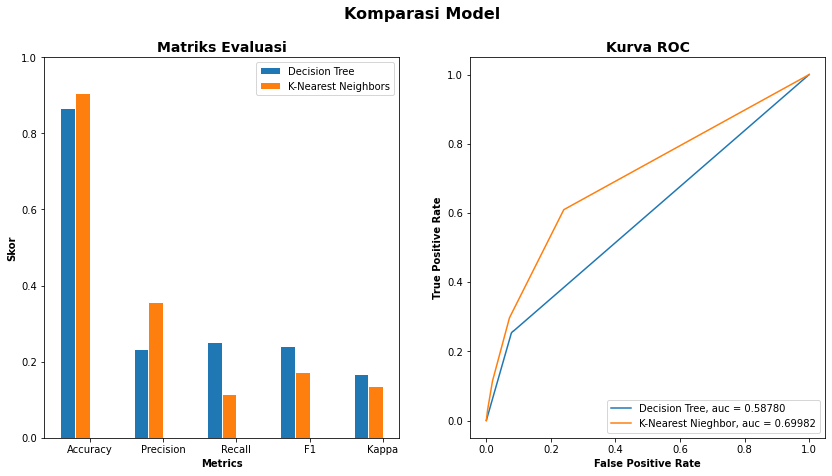

In [16]:
# membuat 2 plot
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Komparasi Model', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# Plot pertama
## Menentukkan ukuran bar
barWidth = 0.2
clf_score = [clf_eval['acc'], clf_eval['prec'], clf_eval['rec'], clf_eval['f1'], clf_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]

## Menentukkan posisi bar pada sumbu X
r1 = np.arange(len(clf_score))
r2 = [x + barWidth for x in r1]

## Membuat plot
ax1.bar(r1, clf_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Konfigurasikan sumbu X dan Y
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(clf_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Skor', fontweight='bold')
ax1.set_ylim(0, 1)

## Membuat legenda dan judul
ax1.set_title('Matriks Evaluasi', fontsize=14, fontweight='bold')
ax1.legend()

# Plot kedua
## Komparasi kurva ROC
ax2.plot(clf_eval['fpr'], clf_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(clf_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))

## Konfigurasikan sumbu X dan Y
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Membuat legenda dan judul
ax2.set_title('Kurva ROC', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()